# Exploratory Data Analysis (EDA)

Data Management course  
Univerisdad Javeriana  
Juan Sebastian Vargas Torres
July, 2022  
  
Dataset: FIFA

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

from sklearn import preprocessing

import itertools
%matplotlib inline

In [ ]:
# Panadas configuration for extending the number of rows and columns to visualize, if not limit set parameter to None or -1
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [ ]:
# Loading the CSV file as dataframe
fifa_df = pd.read_csv('./data/fifa.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (22,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Showing dataframe dimensions
fifa_df.shape

(17981, 74)

In [ ]:
# Showing column types
fifa_df.dtypes

Name                    object
Age                      int64
Photo                   object
Nationality             object
Flag                    object
Overall                  int64
Potential                int64
Club                    object
Club Logo               object
Value                   object
Wage                    object
Special                  int64
Acceleration            object
Aggression              object
Agility                 object
Balance                 object
Ball control            object
Composure               object
Crossing                object
Curve                   object
Dribbling               object
Finishing               object
Free kick accuracy      object
GK diving               object
GK handling             object
GK kicking              object
GK positioning          object
GK reflexes             object
Heading accuracy        object
Interceptions           object
Jumping                 object
Long passing            object
Long sho

In [ ]:
# Showing first rows
fifa_df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Making some basic transformations for columns referring to money: *Value* and *Wage*

In [ ]:
# Analyzing unique values for columns Value and Wage
set(''.join(fifa_df['Value'].values + fifa_df['Wage'].values))

{'.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'K', 'M', '€'}

In [ ]:
# Transforming columns to float based on thousand and million symbols

def money_str_to_float(x):
    x = x.replace('€', '')             # Removing euro symbol
    if 'M' in x:                      # If value has million symbol, remove it and multiply by 1'000.000
        x = x.replace('M', '')
        return float(x) * 1000000
    elif 'K' in x:                    # If value has thousand symbol, remove it and multiply by 1.000
        x = x.replace('K', '')
        return float(x) * 1000
    else:                             # If any symbol is found, only transform the string to float
        return float(x)

fifa_df['Value'] = fifa_df['Value'].apply(money_str_to_float)
fifa_df['Wage'] = fifa_df['Wage'].apply(money_str_to_float)

In [ ]:
fifa_df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,230000.0,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analyzing the *Value* column

In [ ]:
# Getting the mean value for all players
fifa_df['Value'].mean()

2385389.5778877703

In [ ]:
# Getting the median value for all players
fifa_df['Value'].median()

675000.0

In [ ]:
# Getting the player with the greatest value
max_value = fifa_df['Value'].max()

fifa_df.loc[fifa_df['Value'] == max_value]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0


In [ ]:
# Getting the main statistics for the Value column
fifa_df['Value'].describe()

count    1.798100e+04
mean     2.385390e+06
std      5.353970e+06
min      0.000000e+00
25%      3.000000e+05
50%      6.750000e+05
75%      2.100000e+06
max      1.230000e+08
Name: Value, dtype: float64

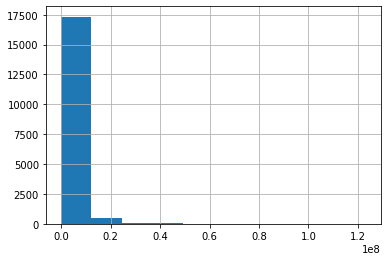

In [ ]:
# Plotting the histogram for the column
fifa_df['Value'].hist()

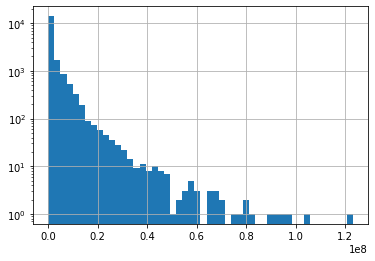

In [ ]:
# Defining the number of bins and the scale for the y-axis for better visualizing
plt.figure()
fifa_df['Value'].hist(bins = 50)
plt.yscale('log') #ventaja de una escala logaritmica, los puedo visualizar mejor, 

{'boxes': [<matplotlib.lines.Line2D at 0x7ffae09d6d50>],
 'caps': [<matplotlib.lines.Line2D at 0x7ffae09dbd90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ffae09e1dd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ffae09e1890>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ffae09db310>,
  <matplotlib.lines.Line2D at 0x7ffae09db850>]}

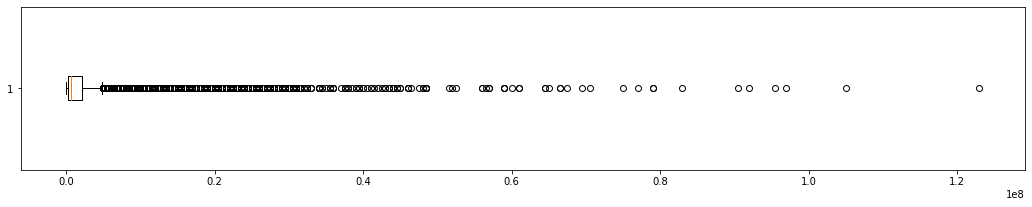

In [ ]:
# Plotting distribution but using a boxplot
plt.figure(figsize = (18, 3))
plt.boxplot(fifa_df['Value'], vert = False)

In [ ]:
# Which are the players with outlier values?
fifa_df[fifa_df['Value'] > (fifa_df['Value'].mean() + fifa_df['Value'].std() * 3)]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,230000.0,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,E. Lamela,25,https://cdn.sofifa.org/48/18/players/170368.png,Argentina,https://cdn.sofifa.org/flags/52.png,80,83,Tottenham Hotspur,https://cdn.sofifa.org/24/18/teams/18.png,18500000.0,96000.0,2047,78,74,77,70,82,75,76,83,85,73,79,10,15,11,8,13,71,43,64,72,82,37,75,77,77,82,80,39,74,77,47,59,80,77,80.0,55.0,63.0,79.0,76.0,170368,80.0,61.0,55.0,76.0,63.0,79.0,79.0,76.0,79.0,65.0,LM RM,80.0,61.0,55.0,76.0,63.0,79.0,79.0,76.0,79.0,65.0,76.0
528,M. Dahoud,21,https://cdn.sofifa.org/48/18/players/218339.png,Germany,https://cdn.sofifa.org/flags/21.png,79,87,Borussia Dortmund,https://cdn.sofifa.org/24/18/teams/22.png,18500000.0,52000.0,1979,78,68,87,78,82,59,67,58,81,60,48,14,7,9,12,11,42,67,70,78,78,63,55,65,74,87,72,61,69,85,65,58,81,49,78.0,64.0,73.0,75.0,78.0,218339,78.0,70.0,64.0,78.0,73.0,75.0,76.0,68.0,76.0,73.0,CDM CM,78.0,70.0,64.0,78.0,73.0,75.0,76.0,68.0,76.0,73.0,68.0
534,A. Correa,22,https://cdn.sofifa.org/48/18/players/214997.png,

In [ ]:
# Because the distribution is so skewed, a greatest number of standard deviations is used 
fifa_df[fifa_df['Value'] > (fifa_df['Value'].mean() + fifa_df['Value'].std() * 17)]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0


In [ ]:
# Using the method based on quartiles to select outliers
iqr = (fifa_df['Value'].quantile(.75) - fifa_df['Value'].quantile(.25))
fifa_df[fifa_df['Value'] > (fifa_df['Value'].quantile(.75) + iqr * 50)]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0


### Analyzing *Preferred Positions* column

In [ ]:
fifa_df['Preferred Positions'].unique()

array(['ST LW ', 'RW ', 'LW ', 'ST ', 'GK ', 'CDM CM ', 'CB ',
       'RM CM CAM ', 'RM LW ST LM ', 'ST CAM ', 'LW RW ST ',
       'CDM CAM CM ', 'RW CAM ', 'RW RM ', 'CM CDM ', 'LM RM CAM ', 'LB ',
       'CM ', 'LM CM CAM ', 'LM CM ', 'LM RM CAM CM ', 'CM CB LB ',
       'LM LB ', 'ST CAM RW CF ', 'CAM LW ', 'LW ST LM ', 'CAM CM ',
       'CDM CB ', 'ST LW CF ', 'CAM CDM CM ', 'LW LM ', 'RM LM ', 'CDM ',
       'LM RW RM ', 'LB RB CB ', 'LW RW ', 'LW LM RM CAM ', 'RM ',
       'LM CF CAM ', 'RB ', 'LM CAM LW ', 'LM RM CM ', 'CAM LM ',
       'CAM RM RW ', 'RM CAM ', 'CAM LW RW ', 'LM ', 'LM CAM ',
       'CAM CF ST ', 'CM CB CDM ', 'RW ST ', 'RW LW CM ', 'CF CAM ',
       'LW CM ', 'RWB RB ', 'CAM ', 'ST CF ', 'LM ST ', 'CM CAM ',
       'CF ST ', 'CB RB ', 'CF CM CAM ', 'LM CAM RW LW ', 'LM RM ',
       'LM RW LW ', 'LM CF RM ', 'CAM LW CM ', 'ST LM ', 'LM ST RM ',
       'RM RW ', 'RM CM ', 'RB CB ', 'CM RW RB ', 'LM RM RW ', 'RW LW ',
       'CM CDM CB ', 'LB CB ', 'ST RM LM ', 'C

<p style="color: red;">How to handle players with multiple Preferred Positions?</p>

<p style="color: red;">Let's take the position with the highest score!</p>

In [ ]:
# How many preferred positions the players have?

def count_pref_positions(x):
    return len(x.strip().split(' '))

fifa_df['Preferred Positions'].apply(count_pref_positions).value_counts(dropna = False, normalize = True)

1    0.541572
2    0.328013
3    0.111284
4    0.019131
Name: Preferred Positions, dtype: float64

In [ ]:
# Select the preferred position with highest score

def get_pref_position(row):
    pref_positions = row['Preferred Positions'].strip().split(' ')
    if len(pref_positions) == 1:
        return pref_positions[0]
    else:
        scores = np.array([row[p] for p in pref_positions])
        i_max = np.argmax(scores)
        return pref_positions[i_max]

fifa_df['Preferred Position'] = fifa_df.apply(get_pref_position, axis = 1)

In [ ]:
# Calculating absolute frecuency for preferred position
pref_positions_abs_frec = fifa_df['Preferred Position'].value_counts(dropna = False)
pref_positions_abs_frec

CB     3306
ST     2456
GK     2029
CM     1559
CDM    1441
LB     1307
CAM    1279
RM     1171
LM     1122
RB     1063
LW      445
RW      440
CF      137
LWB     124
RWB     102
Name: Preferred Position, dtype: int64

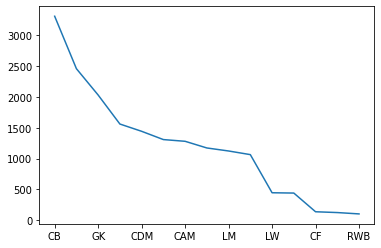

In [ ]:
# Plotting preferred position frecuency
# WARNING: line chart assumes continuity. It is a better choice when dealing with a continuous variable or time
pref_positions_abs_frec.plot()

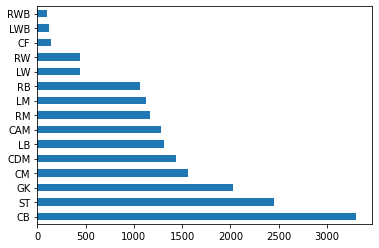

In [ ]:
# Plotting again preferred position frecuency, using a horizontal bar chart this time
pref_positions_abs_frec.plot(kind = 'barh')

In [ ]:
# Calculating absolute frecuency and concatenating results
pref_positions_rel_frec = fifa_df['Preferred Position'].value_counts(dropna = False, normalize = True)
pd.concat([pref_positions_abs_frec, pref_positions_rel_frec], axis = 1)

,Preferred Position,Preferred Position
CB,3306,0.183861
ST,2456,0.136589
GK,2029,0.112841
CM,1559,0.086703
CDM,1441,0.080140
LB,1307,0.072688
CAM,1279,0.071131
RM,1171,0.065124
LM,1122,0.062399
RB,1063,0.059118


### Analyzing *Age* vs. *Value* of the player

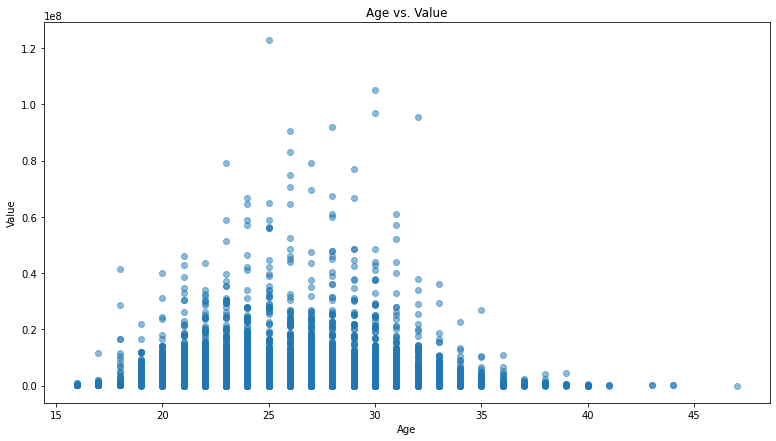

In [ ]:
# Plotting a scatter plot for two quantitative variables
plt.figure(figsize = (13, 7))
plt.scatter(fifa_df['Age'], fifa_df['Value'], alpha = 0.5)
plt.title('Age vs. Value')
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

In [ ]:
# What is the (linear) correlation coefficient?
fifa_df[['Age', 'Value']].corr()

,Age,Value
Age,1.000000,0.079309
Value,0.079309,1.000000


In [ ]:
# What is the (monotonic) correlation coefficient?
fifa_df[['Age', 'Value']].corr('spearman')

,Age,Value
Age,1.000000,0.227658
Value,0.227658,1.000000


### Análisis bivariado sobre las columnas *Value* y *Overall*

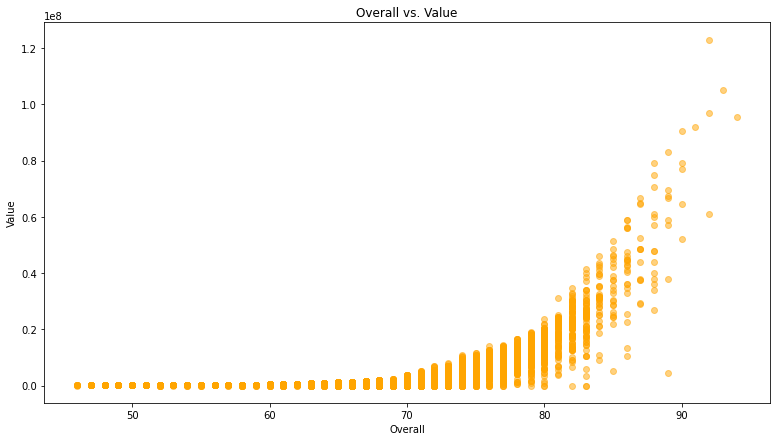

In [ ]:
# Plotting a scatter plot for two quantitative variables
plt.figure(figsize = (13, 7))
plt.scatter(fifa_df['Overall'], fifa_df['Value'], alpha = 0.5, color = 'orange')
plt.title('Overall vs. Value')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.show()

In [ ]:
# What is the (linear) correlation coefficient?
fifa_df[['Overall', 'Value']].corr()

,Overall,Value
Overall,1.000000,0.626001
Value,0.626001,1.000000


In [ ]:
# What is the (monotonic) correlation coefficient?
fifa_df[['Overall', 'Value']].corr('spearman')

,Overall,Value
Overall,1.000000,0.912146
Value,0.912146,1.000000


<p style="color: red;">Why both methods give different correlation coefficients for the same pair of variables?</p>

### Comparing among categories

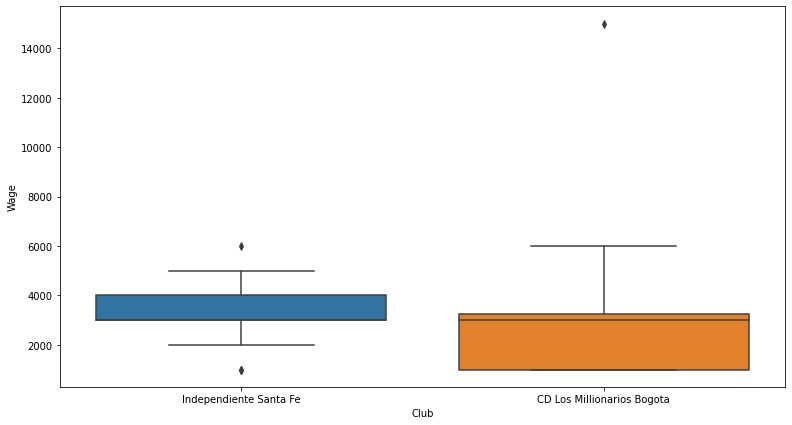

In [ ]:
# Plotting wage by club
plt.figure(figsize = (13, 7))
sns.boxplot(x = 'Club', y = 'Wage', data = fifa_df.loc[fifa_df['Club'].isin(['Independiente Santa Fe', 'CD Los Millionarios Bogota'])])

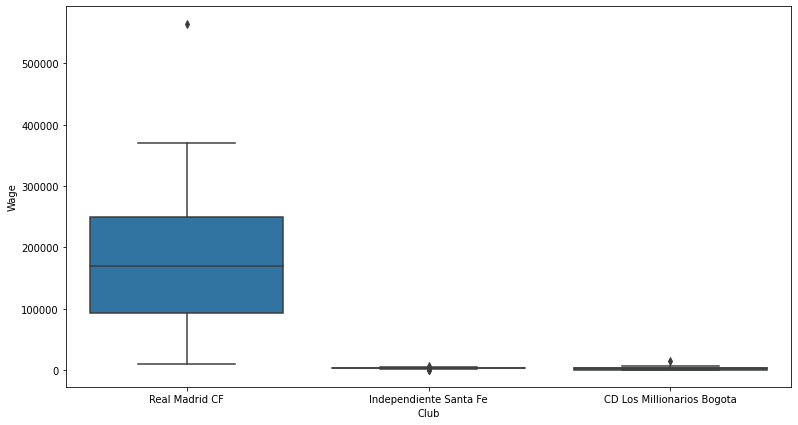

In [ ]:
# Plotting wage by club, including a differential club
plt.figure(figsize = (13, 7))
sns.boxplot(x = 'Club', y = 'Wage', data = fifa_df.loc[fifa_df['Club'].isin(['Independiente Santa Fe', 'CD Los Millionarios Bogota', 'Real Madrid CF'])])

### Profiling the data

In [ ]:
#profile = ProfileReport(fifa_df)

In [ ]:
#profile.to_notebook_iframe()

### Preguntas

#### ¿Existe algún tipo de correlación entre el valor (value) y el salario (wage) de los jugadores?

In [ ]:
fifa_df["Value"].corr(fifa_df["Wage"])

0.8505101958934225

Se logra obsevar que existe una correlacción positiva bastante alta entre los dos features, lo que implica que si una crece la otra también tenderá a crecer.

#### ¿Qué clubes concentran el top 5 (>= percentile 95%) de los jugadores con un mayor puntaje general (overall)?

In [ ]:
#top_5_clubes= fifa_df.sort_values(by="Overall", ascending=False)
top_5_clubes= fifa_df.copy()

In [ ]:
top_5_clubes

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Preferred Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,230000.0,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,50000.0,1000.0,755,24,16,38,26,12,23,14,13,12,5,12,46,47,49,42,48,10,9,31,21,7,9,17,6,40,19,19,10,32,28,11,50,26,6,NaN,NaN,NaN,NaN,NaN,237463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
17977,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,0.0,1000.0,832,25,44,35,44,22,44,11,12,11,11,11,39,50,39,50,37,12,16,51,13,16,14,22,13,51,12,13,13,25,32,12,47,17,12,NaN,NaN,NaN,NaN,NaN,11728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
17978,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.so

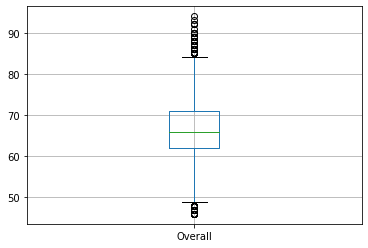

In [ ]:
top_5_clubes.boxplot("Overall")

In [ ]:
q_95=top_5_clubes["Overall"].quantile(0.99)
q_95

83.0

In [ ]:
(top_5_clubes.loc[(top_5_clubes["Overall"])>=q_95]).shape

(198, 75)

In [ ]:
(top_5_clubes.loc[(top_5_clubes["Overall"])>=q_95])["Club"].unique()

array(['Real Madrid CF', 'FC Barcelona', 'Paris Saint-Germain',
       'FC Bayern Munich', 'Manchester United', 'Chelsea', 'Juventus',
       'Manchester City', 'Arsenal', 'Atlético Madrid',
       'Borussia Dortmund', 'Milan', 'Tottenham Hotspur', 'Napoli',
       'Inter', 'Liverpool', 'Roma', 'Beşiktaş JK', 'AS Monaco',
       'Bayer 04 Leverkusen', 'AS Saint-Étienne',
       'Athletic Club de Bilbao', '1. FC Köln', 'Villarreal CF',
       'FC Schalke 04', 'Olympique de Marseille', 'Atalanta',
       'RB Leipzig', 'Real Sociedad', 'Torino', 'Sporting CP',
       'Leicester City', 'Southampton', 'FC Porto', 'UD Las Palmas',
       'Olympique Lyonnais', 'Lazio', 'Genoa', 'Everton',
       'RC Celta de Vigo', 'Valencia CF', nan, 'Sevilla FC', 'Toronto FC',
       'Borussia Mönchengladbach', 'SL Benfica', 'RCD Espanyol',
       'OGC Nice'], dtype=object)

#### ¿Cuál es el jugador con mayor potencial (potential) respecto a su puntaje general (overall)? ¿Cuántos años tiene? ¿Qué posiciones son sus preferidas (preferred positions)?

In [ ]:
ff_copy= fifa_df

In [ ]:
ff_copy

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Preferred Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,230000.0,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,50000.0,1000.0,755,24,16,38,26,12,23,14,13,12,5,12,46,47,49,42,48,10,9,31,21,7,9,17,6,40,19,19,10,32,28,11,50,26,6,NaN,NaN,NaN,NaN,NaN,237463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
17977,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,0.0,1000.0,832,25,44,35,44,22,44,11,12,11,11,11,39,50,39,50,37,12,16,51,13,16,14,22,13,51,12,13,13,25,32,12,47,17,12,NaN,NaN,NaN,NaN,NaN,11728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK
17978,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.so

In [ ]:
ff_copy["Potential/overall ratio"]=ff_copy["Potential"]/ff_copy["Overall"]

In [ ]:
ff_copy.sort_values(by="Potential/overall ratio", ascending=False).head(1)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Preferred Position,Potential/overall ratio
17961,J. Latibeaudiere,17,https://cdn.sofifa.org/48/18/players/233047.png,England,https://cdn.sofifa.org/flags/14.png,47,73,Manchester City,https://cdn.sofifa.org/24/18/teams/10.png,60000.0,5000.0,1132,57,45,44,64,30,43,21,22,32,19,28,12,7,7,11,6,42,45,66,32,22,45,34,21,45,36,32,47,54,62,52,45,27,20,32.0,46.0,42.0,32.0,35.0,233047,32.0,45.0,46.0,35.0,42.0,32.0,35.0,32.0,32.0,43.0,CB,32.0,45.0,46.0,35.0,42.0,32.0,35.0,32.0,32.0,43.0,32.0,CB,1.553191


Es J. Latibeaudiere tiene 17 años su posición preferida es CB (Cornerback)

#### Para los 5 equipos con mayor valor (value) total pagado por todos sus jugadores:

In [ ]:
top_5_total_value_teams= fifa_df

In [ ]:
top_5_total_value_teams=top_5_total_value_teams[["Club","Value"]]
top_5_total_value_teams=top_5_total_value_teams.groupby(by="Club").sum().reset_index()
top_5_total_value_teams=top_5_total_value_teams.sort_values(by="Value", ascending= False)
top_5_total_value_teams.head(5)

,Club,Value
466,Real Madrid CF,826700000.0
222,FC Bayern Munich,748825000.0
219,FC Barcelona,744500000.0
142,Chelsea,673085000.0
432,Paris Saint-Germain,631750000.0


In [ ]:
top_clubs=top_5_total_value_teams.head(5)["Club"]
top_clubs

466         Real Madrid CF
222       FC Bayern Munich
219           FC Barcelona
142                Chelsea
432    Paris Saint-Germain
Name: Club, dtype: object

##### ¿Cuáles y cuántos jugadores de las diferentes nacionalidades tiene en su nómina?

In [ ]:
for club in top_clubs:
  aux_fifa_df=fifa_df.loc[(fifa_df["Club"]==club)]
  print("------------CLUB: ",club,"------------")
  print("--Jugadores:")
  print(aux_fifa_df["Name"].unique())
  print("\n")
  print("--Nacionalidades:")
  print(aux_fifa_df["Nationality"].value_counts())
  print("------------------------------------------------")
  print("\n\n\n\n")

------------CLUB:  Real Madrid CF ------------
--Jugadores:
['Cristiano Ronaldo' 'T. Kroos' 'Sergio Ramos' 'L. Modrić' 'G. Bale'
 'Marcelo' 'Isco' 'K. Benzema' 'R. Varane' 'Casemiro' 'K. Navas'
 'Marco Asensio' 'Carvajal' 'Lucas Vázquez' 'M. Kovačić' 'Nacho Fernández'
 'Kiko Casilla' 'Dani Ceballos' 'Marcos Llorente' 'Vallejo' 'T. Hernández'
 'Borja Mayoral' 'A. Hakimi' 'Óscar' 'Álvaro Tejero' 'L. Zidane']


--Nacionalidades:
Spain         13
France         4
Croatia        2
Brazil         2
Portugal       1
Germany        1
Wales          1
Costa Rica     1
Morocco        1
Name: Nationality, dtype: int64
------------------------------------------------





------------CLUB:  FC Bayern Munich ------------
--Jugadores:
['M. Neuer' 'R. Lewandowski' 'Thiago' 'J. Boateng' 'M. Hummels'
 'A. Robben' 'A. Vidal' 'J. Rodríguez' 'D. Alaba' 'T. Müller'
 'Javi Martínez' 'F. Ribéry' 'N. Süle' 'C. Tolisso' 'J. Kimmich' 'S. Rudy'
 'K. Coman' 'Bernat' 'Rafinha' 'S. Ulreich' 'C. Früchtl' 'M. Friedl'

##### ¿Cuál es la distribución de los salarios (wage) pagados a sus jugadores?

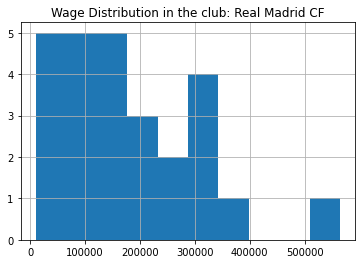

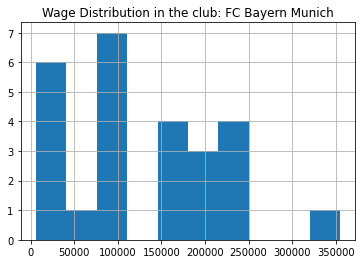

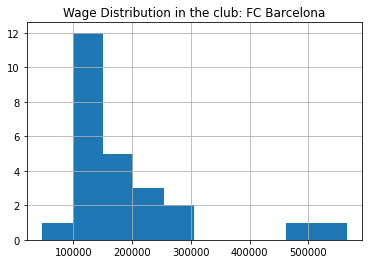

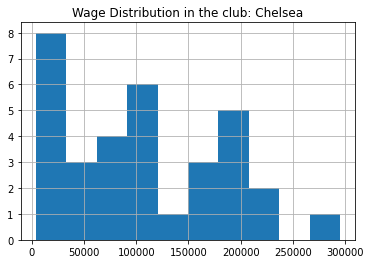

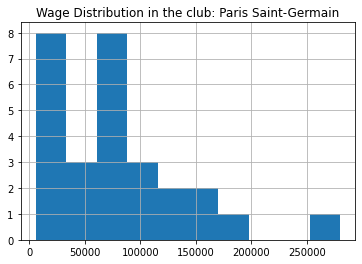

In [ ]:
for club in top_clubs:
  aux_fifa_df=fifa_df.loc[(fifa_df["Club"]==club)]
  aux_fifa_df.hist(column="Wage")
  title='Wage Distribution in the club: '+club
  plt. title(title)
  plt.show()
  print("\n\n\n\n")

##### ¿Cuál es el jugador con mayor capacidad para marcar goles (finishing)? ¿Qué posiciones son sus preferidas?


In [ ]:
for club in top_clubs:
  aux_fifa_df=fifa_df.loc[(fifa_df["Club"]==club)]
  aux_fifa_df=aux_fifa_df.sort_values(by="Finishing" ,ascending=False)
  print("------------CLUB: ",club,"------------")
  print("--Jugador con mayor capacidad para marcar goles: \n",aux_fifa_df.head(1)["Name"])
  print("---Posición preferida: \n",aux_fifa_df.head(1)["Preferred Position"])
  print("------------------------------------------------------------------")
  print("\n\n\n\n")

------------CLUB:  Real Madrid CF ------------
--Jugador con mayor capacidad para marcar goles: 
 0    Cristiano Ronaldo
Name: Name, dtype: object
---Posición preferida: 
 0    ST
Name: Preferred Position, dtype: object
------------------------------------------------------------------





------------CLUB:  FC Bayern Munich ------------
--Jugador con mayor capacidad para marcar goles: 
 5    R. Lewandowski
Name: Name, dtype: object
---Posición preferida: 
 5    ST
Name: Preferred Position, dtype: object
------------------------------------------------------------------





------------CLUB:  FC Barcelona ------------
--Jugador con mayor capacidad para marcar goles: 
 1    L. Messi
Name: Name, dtype: object
---Posición preferida: 
 1    RW
Name: Preferred Position, dtype: object
------------------------------------------------------------------





------------CLUB:  Chelsea ------------
--Jugador con mayor capacidad para marcar goles: 
 58    Diego Costa
Name: Name, dtype: object
-

# QUIZ


## ML 

In [ ]:
def cost(X, theta, Y):
  """Calcula el error medio cuadrático de la predicción
  
  Args:
    - X: features
    - theta: coeficientes de predicción
    - Y: etiqueta

  Returns:
    - Calculo aritmético del MSE
  """
  # Inflar X con la columna constante
  X_c = np.hstack((np.ones((X.shape[0], 1)), X))

  n = X_c.shape[0]
  Y_est = X_c.dot(theta)
  return (1/n) * np.sum(
      np.power(Y_est - Y, 2)
  )

In [ ]:
def fit_model(X, Y, lr=0.001, ul=10**-10, max_iters=1000000):
  """Realiza la regresión lineal por el método de gradiente

  Args:
    - X: features
    - Y: etiqueta
    - lr: (learning rate) tamaño del paso
    - ul: (update limit) límite del update (para parar el algoritmo)
    - max_iters: número máximo iteraciones
  Returns:
    - valores de theta ajustados
  """

  # Inflar X con la columna constante
  X_c = np.hstack((np.ones((X.shape[0], 1)), X))
  # (n, m) dimensiones de X
  n = X_c.shape[0]
  m = X_c.shape[1]
  
  # Elegir theta inicial al azar
  theta = np.random.rand(m,1)

  i = 0 # iteración
  last_theta = theta
  # Hacer el paso de aprendizaje mientras...
  # No se exceda la cantidad máxima de iteraciones
  # El update size sea menor al update limit
  while (i < max_iters):
    # Calcular el gradiente del paso actual
    gradient = (1/n) * np.matmul(X_c.T, (X_c.dot(theta) - Y))
    # Hacer el paso
    last_theta = theta
    theta = theta - lr*gradient
    # Medir si el paso fue sustancial
    update = last_theta - theta
    for update_i in update:
      if abs(update_i) < ul:
        break
    
    i += 1
  
  return theta

In [ ]:
def plot_result(X,Y, thetas, title):
  X_inflado= np.hstack((np.ones((X.shape[0],1)),X))
  plt.scatter(X, Y, alpha=0.5)
  plt.plot(X, X_inflado.dot(thetas), color='red')
  plt.title(title)
  plt.show()

In [ ]:
def predict(X, thetas):
  X_c = np.hstack((np.ones((X.shape[0], 1)), X))
  return X_c.dot(thetas)

## H1

In [ ]:
h1_copy=fifa_df.copy()

In [ ]:
h1_copy.head(5)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Preferred Position,Potential/overall ratio
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,565000.0,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,ST,1.000000
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,565000.0,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,RW,1.000000
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,280000.0,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,LW,1.021739
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,510000.0,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,ST,1.000000
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,230000.0,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,1.000000


### Validación Hipótesis

In [ ]:
def validate(df_input, features):
  f_selected=features.copy()
  f_selected.append("Overall")
  df=df_input.copy()
  df=df[f_selected]
  for c in features:
    df[c]=((df[c].astype(str)).str[0:2]).astype(int)
  df["mean"]= df[features].mean(axis=1)
  df["Overall-mean"]= (df["Overall"]-df["mean"]).abs()
  sorted=df[["Overall","mean","Overall-mean"]].sort_values(by="Overall-mean", ascending=False)
  print("------------------------------------------------------")
  print("With the features: ",features, "The result is: ")
  print("Number of exactly predicted Overall (Overall-mean=0): ", sorted.loc[(sorted["Overall-mean"]==0)].shape[0])
  print("MSE: ",(1/df.shape[0]) * np.sum(np.power(df["Overall-mean"], 2)))
  print("------------------------------------------------------")


In [ ]:
f_selected_for_mean1=["Acceleration","Agility","Balance","Ball control"]
f_selected_for_mean2=["Acceleration","Agility","Balance","Ball control","Aggression"]
f_selected_for_mean3=["Acceleration","Agility","Balance","Ball control","Aggression","Composure"]
f_selected_for_mean4=["Acceleration","Agility","Balance","Ball control","Aggression","Composure","Crossing"]
validate(h1_copy, f_selected_for_mean1)
validate(h1_copy, f_selected_for_mean2)
validate(h1_copy, f_selected_for_mean3)
validate(h1_copy, f_selected_for_mean4)

------------------------------------------------------
With the features:  ['Acceleration', 'Agility', 'Balance', 'Ball control'] The result is: 
Number of exactly predicted Overall (Overall-mean=0):  183
MSE:  185.9058902452589
------------------------------------------------------
------------------------------------------------------
With the features:  ['Acceleration', 'Agility', 'Balance', 'Ball control', 'Aggression'] The result is: 
Number of exactly predicted Overall (Overall-mean=0):  208
MSE:  163.73679328179747
------------------------------------------------------
------------------------------------------------------
With the features:  ['Acceleration', 'Agility', 'Balance', 'Ball control', 'Aggression', 'Composure'] The result is: 
Number of exactly predicted Overall (Overall-mean=0):  224
MSE:  149.45426963028876
------------------------------------------------------
------------------------------------------------------
With the features:  ['Acceleration', 'Agility', 'B

## H2

In [ ]:
h2_copy=fifa_df[["Overall","Age"]]

In [ ]:
h2_copy

,Overall,Age
0,94,32
1,93,30
2,92,25
3,92,30
4,92,31
...,...,...
17976,46,17
17977,46,47
17978,46,17
17979,46,18


Text(0, 0.5, 'Overall')

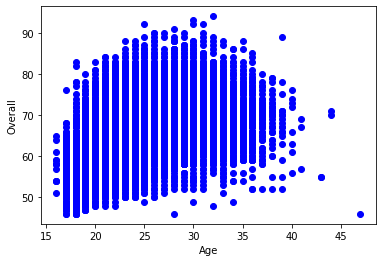

In [ ]:
plt.scatter(h2_copy["Age"],h2_copy["Overall"], color ='blue')
plt.xlabel("Age")
plt.ylabel("Overall")

In [ ]:
corr1 = h2_copy.corr()
corr1.style.background_gradient(cmap='coolwarm')

,Overall,Age
Overall,1.000000,0.459765
Age,0.459765,1.000000


In [ ]:
# Uso 70% para entrenamiento (random split)
train_df1= h2_copy.sample(frac=0.7,random_state=200)
rest_df1 = h2_copy.drop(train_df1.index)
# Uso 15% para validacion y 15% para test
val_df1=rest_df1.sample(frac=0.5,random_state=200)
test_df1=rest_df1.drop(val_df1.index)

In [ ]:
X_train= train_df1[["Age"]].values
Y_train= train_df1[['Overall']].values

X_val= val_df1[["Age"]].values
Y_val= val_df1[['Overall']].values

X_test= val_df1[["Age"]].values
Y_test= test_df1[['Overall']].values

In [ ]:
thetas1=fit_model(X_train, Y_train, ul=10**-7) 

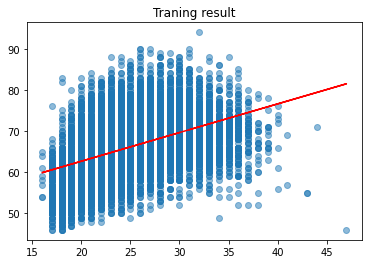

In [ ]:
plot_result(X_train,Y_train, thetas1, "Traning result")

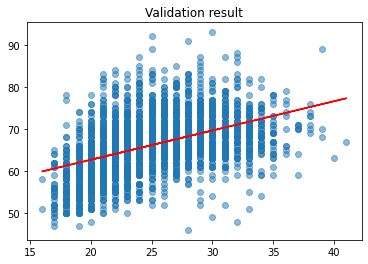

In [ ]:
plot_result(X_val,Y_val, thetas1, "Validation result")

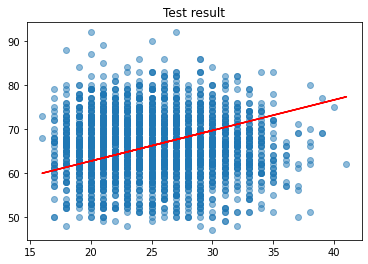

In [ ]:
plot_result(X_test,Y_test, thetas1, "Test result")

In [ ]:
# Error del modelo para los valores de entrenamiento
print('MSE Train:', cost(X_train, thetas1, Y_train))
# Error del modelo para los valores de validación
print('MSE Validation:', cost(X_val, thetas1, Y_val))
# Error del modelo para los valores de test
print('MSE Test:', cost(X_test, thetas1, Y_test))

MSE Train: 38.559049750850114
MSE Validation: 38.660339852041496
MSE Test: 58.85947472042391


In [ ]:
prediction_x= np.linspace(10, 60,100)
prediction_x=prediction_x[:,np.newaxis]

In [ ]:
prediction_x.shape

(100, 1)

In [ ]:
y_predict= predict(prediction_x, thetas1)

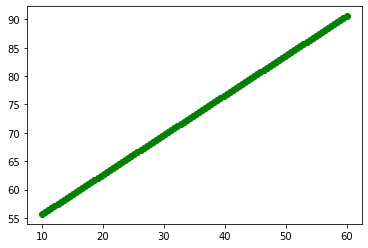

In [ ]:
plt.scatter(prediction_x,y_predict, color="green")

## H3

In [ ]:
features2=["Acceleration","Agility","Balance","Ball control"]

In [ ]:
features_and_overall=features2
features_and_overall.append("Overall")

In [ ]:
features_and_overall

['Acceleration', 'Agility', 'Balance', 'Ball control', 'Overall']

In [ ]:
h3_copy=fifa_df.copy()

In [ ]:
h3_copy=h3_copy[features_and_overall]

### Limpieza

In [ ]:
h3_copy.dtypes

Acceleration    object
Agility         object
Balance         object
Ball control    object
Overall          int64
dtype: object

In [ ]:
for c in features2:
  h3_copy[c]=((h3_copy[c].astype(str)).str[0:2]).astype(int)

In [ ]:
corr = h3_copy.corr()
corr.style.background_gradient(cmap='coolwarm')

,Acceleration,Agility,Balance,Ball control,Overall
Acceleration,1.000000,0.798994,0.701170,0.670556,0.204208
Agility,0.798994,1.000000,0.765775,0.701015,0.265458
Balance,0.701170,0.765775,1.000000,0.596927,0.096650
Ball control,0.670556,0.701015,0.596927,1.000000,0.452109
Overall,0.204208,0.265458,0.096650,0.452109,1.000000


In [ ]:
#h3_copy=h3_copy.drop(["Agility"], axis=1)
#features2.remove("Agility")

In [ ]:
# Uso 70% para entrenamiento (random split)
train_df2= h3_copy.sample(frac=0.7,random_state=200)
rest_df2= h3_copy.drop(train_df1.index)
# Uso 15% para validacion y 15% para test
val_df2=rest_df2.sample(frac=0.5,random_state=200)
test_df2=rest_df2.drop(val_df1.index)

In [ ]:
X_train2= train_df2[features2].values
Y_train2= train_df2[['Overall']].values

X_val2= val_df2[features2].values
Y_val2= val_df2[['Overall']].values

X_test2= val_df2[features2].values
Y_test2= test_df2[['Overall']].values

In [ ]:
thetas2=fit_model(X_train2, Y_train2, ul=10**-30, lr=0.000000001, max_iters=1000000)

In [ ]:
0.00000001

1e-08

In [ ]:
thetas2

array([[ 0.25664617],
       [-0.11633978],
       [ 0.27497218],
       [ 0.52650054],
       [-0.19300845],
       [ 0.49817804]])

In [ ]:
# Error del modelo para los valores de entrenamiento
print('MSE Train:', cost(X_train2, thetas2, Y_train2))
# Error del modelo para los valores de validación
print('MSE Validation:', cost(X_val2, thetas2, Y_val2))
# Error del modelo para los valores de test
print('MSE Test:', cost(X_test2, thetas2, Y_test2))

MSE Train: 74.8683519931724
MSE Validation: 76.70976015952107
MSE Test: 122.11080577949464


## Conclusiones

- Respecto a la primer hipótesis se logró envidenciar que el overall es una aproximación de la media entre:
Acceleration, Agility, Balance, Ball control

  Sin embargo, se logró también envidenciar dos features adicionales que realizando la media, es más exacta, dichos serían los siguientes: 

  Acceleration, Agility, Balance, Ball control, Aggression, Composure.


- Respecto a la segunda hipótesis, se logró envidenciar a través de una regresión lineal simple, que a mayor edad mayor overall y a menor edad menor overall.

- Respecto a la tercera hipótesis, se logró realizar una regresión múltiple con los siguientes features: 



  Dando como resultado un error de entrenamiento= 74.8683519931724

  Dando como resultado un error de validación= 76.70976015952107

  Dando como resultado un error de test= 122.11080577949464